<a href="https://colab.research.google.com/github/viratchowdary21/text-summerization-using-encoder-decoder-model-with-attention-mechanism-/blob/main/text_summarization_CW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time

In [ ]:
!pip install chart-studio

     |████████████████████████████████| 71kB 8.6MB/s 


In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

#tf.enable_eager_execution()

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import time
import string

import chart_studio.plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
#%plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import os


In [ ]:
import pandas as pd

df1 = pd.read_json (r'/content/drive/MyDrive/summerization/dev-stats.jsonl', lines = True, convert_dates=True,compression='infer')

In [ ]:
# Loading Essential libraries 
import warnings
import numpy as np # linear algebra

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False # this to force autocompletion 
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df1.head(5)

,url,archive,title,date,text,summary,compression,coverage,density,compression_bin,coverage_bin,density_bin
0,http://www.foxsports.com/baseball/xchange/team...,http://web.archive.org/web/19980117162148id_/h...,Pro Sports Xchange notes,1970-08-20 06:01:57.162148,So sayeth Padre general manager Kevin Towers.\...,SAN DIEGO PADRES team notebook,209.000000,0.800000,1.200000,high,medium,abstractive
1,http://www.nytimes.com/2006/06/05/technology/0...,http://web.archive.org/web/20060620021852id_/h...,India Becoming a Crucial Cog in the Machine at...,1970-08-21 04:23:40.021852,"BANGALORE, India, June 4  The world's biggest...",India provides I.B.M. with its fastest-growing...,56.045455,0.954545,16.500000,high,high,extractive
2,http://www.nydailynews.com/archives/news/1995/...,http://web.archive.org/web/20110210093603id_/h...,NEW YORKERS' ONLY REGRET WAS STAYING HOME,1970-08-21 18:10:10.093603,"This story was reported by: NICK CHARLES, AUST...",As many black men marched on Washington yester...,6.152941,0.976471,24.600000,low,high,extractive
3,http://mashable.com/2010/10/16/twitter-top-top...,http://web.archive.org/web/20120123100903id_/h...,Top 10 Twitter Trends This Week [CHART],1970-08-21 20:55:23.100903,Remember when everyone on Earth was glued to T...,Check out the chart to find out what the world...,14.631579,0.842105,1.368421,low,medium,abstractive
4,http://www.reuters.com/article/2011/01/31/us-i...,http://web.archive.org/web/20120321005702id_/h...,Freed American hiker summoned back by Iran court,1970-08-21 20:58:41.005702,"TEHRAN | Mon Jan 31, 2011 9:17am EST\n\nTEHRAN...",TEHRAN (Reuters) - An American woman who was f...,7.902439,1.000000,39.048780,low,high,extractive


In [ ]:
df = df1.iloc[:, [4,5]]

In [ ]:
df.head(1)

,text,summary
0,So sayeth Padre general manager Kevin Towers.\...,SAN DIEGO PADRES team notebook


In [ ]:
df['len_summary'] = df.summary.apply(lambda x: len(x.split()))
df['len_text'] = df.text.apply(lambda x:len(x.split()))

In [ ]:
df.head(1)

,text,summary,len_summary,len_text
0,So sayeth Padre general manager Kevin Towers.\...,SAN DIEGO PADRES team notebook,5,813


i had limited the dataset size

In [ ]:
df = df[(df.len_text <=60) *(df.len_summary <= 20)]


In [ ]:
df.shape

(332, 4)

### Lets do some text preprocessing 

In [ ]:
# lowercasing all the words
df['summary'] = df.summary.apply(lambda x: x.lower())
df['text'] = df.text.apply(lambda x: x.lower())

In [ ]:
!pip install text_hammer
import  text_hammer as th

     |████████████████████████████████| 122kB 8.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
# Remove quotes 
def Text_cleaning(df, column):
    column = column
    print(column)
    import re
    """column must be a string value"""
    df[column] = df[column].progress_apply(lambda x: re.sub('"',"'", x))
    df[column] = df[column].progress_apply(lambda x:th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x:th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_urls(x))
    df[column] = df[column].progress_apply(lambda x:th.cont_exp(x))
    df[column] = df[column].progress_apply(lambda x: re.sub('[^a-zA-Z]+',' ', x))
    df[column] = df[column].progress_apply(lambda x:' '.join([x for x in x.split() if len(x)>=2]) )
    return df[column]



In [ ]:
cleaned_summary= Text_cleaning(df, 'summary')

summary


In [ ]:
cleaned_text = Text_cleaning(df, 'text')

text


In [ ]:
cleaned_df = pd.DataFrame({'summary':cleaned_summary, 'text':cleaned_text})
cleaned_df.head()

,summary,text
112,when imago group was founded in video conferen...,ian tells business club how almost two decades...
183,yours truly did an interview with richard ques...,fortune minute roundup of the reasons behind a...
218,britishbased bank standard chartered is to app...,telegraph media group limited
462,melissa benishay talks about what went into ma...,when melissa benishay was fired from her new y...
563,meet paul on nbccom,paul cummings is firstyear surgical resident a...


In [ ]:
cleaned_df.to_csv('dev.csv')

In [ ]:
cleaned_df['length_eng_sentence']=cleaned_df['text'].apply(lambda x:len(x.split(" ")))
cleaned_df['length_hin_sentence']=cleaned_df['summary'].apply(lambda x:len(x.split(" ")))

In [ ]:
cleaned_df.shape

(332, 4)

In [ ]:
cleaned_df[cleaned_df['length_eng_sentence']>30].shape

(327, 4)

In [ ]:
eng_cleaned_df=cleaned_df['text'].to_list()
hin_cleaned_df=cleaned_df['summary'].to_list()


In [ ]:
exclude = set(string.punctuation) # Set of all special characters
remove_digits = str.maketrans('', '', string.digits) # Set of all digits

In [ ]:
cleaned_df.head()

,summary,text,length_eng_sentence,length_hin_sentence
112,when imago group was founded in video conferen...,ian tells business club how almost two decades...,50,13
183,yours truly did an interview with richard ques...,fortune minute roundup of the reasons behind a...,49,11
218,britishbased bank standard chartered is to app...,telegraph media group limited,4,13
462,melissa benishay talks about what went into ma...,when melissa benishay was fired from her new y...,56,19
563,meet paul on nbccom,paul cummings is firstyear surgical resident a...,58,4


In [ ]:
cleaned_df = cleaned_df.drop(['length_eng_sentence', 'length_hin_sentence'], axis=1)

In [ ]:
cleaned_df.head()

,summary,text
112,when imago group was founded in video conferen...,ian tells business club how almost two decades...
183,yours truly did an interview with richard ques...,fortune minute roundup of the reasons behind a...
218,britishbased bank standard chartered is to app...,telegraph media group limited
462,melissa benishay talks about what went into ma...,when melissa benishay was fired from her new y...
563,meet paul on nbccom,paul cummings is firstyear surgical resident a...


In [ ]:
cleaned_df['summary'] = '<start> ' + cleaned_df['summary'] + ' <end>'


In [ ]:
cleaned_df['text'] = '<start> ' + cleaned_df['text'] + ' <end>'


In [ ]:
cleaned_df.head()

,summary,text
112,<start> when imago group was founded in video ...,<start> ian tells business club how almost two...
183,<start> yours truly did an interview with rich...,<start> fortune minute roundup of the reasons ...
218,<start> britishbased bank standard chartered i...,<start> telegraph media group limited <end>
462,<start> melissa benishay talks about what went...,<start> when melissa benishay was fired from h...
563,<start> meet paul on nbccom <end>,<start> paul cummings is firstyear surgical re...


In [ ]:
sent_pair1 = []
sent_pair2 = []

for line in cleaned_df['text'].to_list():
    sent_pair = []
    eng = line
    sent_pair1.append(eng)

for line in cleaned_df['summary'].to_list():
  hin = line
  sent_pair2.append(hin)

sent_pairs = [[a, b] for a, b in zip(sent_pair1, sent_pair2)]


sent_pairs[1:10]



[['<start> fortune minute roundup of the reasons behind apple aapl ceo tim cooks letter of apology to his chinese customers recorded monday afternoon before chinas response not much here that regular readers havent heard beforeto view full screen start the video and click the box in the lower right corner <end>',
  '<start> yours truly did an interview with richard queston cnn international monday <end>'],
 ['<start> telegraph media group limited <end>',
  '<start> britishbased bank standard chartered is to appoint senior international monetary fund executive jos <end>'],
 ['<start> when melissa benishay was fired from her new york city advertising job in june amid the recessionshe went home and baked some cupcakesit was the best decision she ever made she sayswithin week and with some help from her brother she had new job president and chief product officer of baked by melissa her own cupcake <end>',
  '<start> melissa benishay talks about what went into making her cupcake business in

In [ ]:
def tokenize(lang):
  lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(
      filters='')
  lang_tokenizer.fit_on_texts(lang)

  tensor = lang_tokenizer.texts_to_sequences(lang)

  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
                                                         padding='post')

  return tensor, lang_tokenizer

In [ ]:
def load_dataset(path, num_examples=None):
  # creating cleaned input, output pairs
  targ_lang, inp_lang = cleand_df['summary'], cleaned_df['text']

  input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
  target_tensor, targ_lang_tokenizer = tokenize(targ_lang)

  return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

In [ ]:
len(sent_pairs)

332

In [ ]:
sent_pairs

[['<start> ian tells business club how almost two decades later his company uses video conferencing internally and externally in every part of the business and how practising what they preach is the ideal marketing strategy for introducing video conferencing to new customersoffices worldwide france uk spain holland belgium china south africa <end>',
  '<start> when imago group was founded in video conferencing was an embryonic business product <end>'],
 ['<start> fortune minute roundup of the reasons behind apple aapl ceo tim cooks letter of apology to his chinese customers recorded monday afternoon before chinas response not much here that regular readers havent heard beforeto view full screen start the video and click the box in the lower right corner <end>',
  '<start> yours truly did an interview with richard queston cnn international monday <end>'],
 ['<start> telegraph media group limited <end>',
  '<start> britishbased bank standard chartered is to appoint senior international m

In [ ]:
# This class creates a word -> index mapping (e.g,. "dad" -> 5) and vice-versa 
# (e.g., 5 -> "dad") for each language,
class LanguageIndex():
    def __init__(self, lang):
        self.lang = lang
        self.word2idx = {}
        self.idx2word = {}
        self.vocab = set()

        self.create_index()

    def create_index(self):
        for phrase in self.lang:
            self.vocab.update(phrase.split(' '))

        self.vocab = sorted(self.vocab)

        self.word2idx['<pad>'] = 0
        for index, word in enumerate(self.vocab):
            self.word2idx[word] = index + 1

        for word, index in self.word2idx.items():
            self.idx2word[index] = word

In [ ]:
def max_length(tensor):
    return max(len(t) for t in tensor)

In [ ]:
def load_dataset(pairs, num_examples):
    # pairs => already created cleaned input, output pairs

    # index language using the class defined above    
    inp_lang = LanguageIndex(en for en, ma in pairs)
    targ_lang = LanguageIndex(ma for en, ma in pairs)
    
    # Vectorize the input and target languages
    
    input_tensor = [[inp_lang.word2idx[s] for s in en.split(' ')] for en, ma in pairs]
    
    target_tensor = [[targ_lang.word2idx[s] for s in ma.split(' ')] for en, ma in pairs]
    
    # Calculate max_length of input and output tensor
    # Here, we'll set those to the longest sentence in the dataset
    max_length_inp, max_length_tar = max_length(input_tensor), max_length(target_tensor)
    
    # Padding the input and output tensor to the maximum length
    input_tensor = tf.keras.preprocessing.sequence.pad_sequences(input_tensor, 
                                                                 maxlen=max_length_inp,
                                                                 padding='post')
    
    target_tensor = tf.keras.preprocessing.sequence.pad_sequences(target_tensor, 
                                                                  maxlen=max_length_tar, 
                                                                  padding='post')
    
    return input_tensor, target_tensor, inp_lang, targ_lang, max_length_inp, max_length_tar

In [ ]:
input_tensor, target_tensor, inp_lang, targ_lang, max_length_inp, max_length_targ = load_dataset(sent_pairs, len(cleaned_df))

In [ ]:
# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.1, random_state = 101)

# Show length
len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val)

(298, 298, 34, 34)

In [ ]:
def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.idx2word[t]))

In [ ]:
print ("Input Language; index to word mapping")
convert(inp_lang, input_tensor_train[0])
print ()
print ("Target Language; index to word mapping")
convert(targ_lang, target_tensor_train[0])

Input Language; index to word mapping
2 ----> <start>
2039 ----> former
5755 ----> west
384 ----> australian
4032 ----> premier
4400 ----> richard
1226 ----> court
5790 ----> will
483 ----> be
385 ----> australias
3540 ----> next
191 ----> ambassador
5350 ----> to
2740 ----> japanin
5258 ----> the
1672 ----> emperor
3621 ----> of
2738 ----> japan
1140 ----> conferred
3651 ----> on
3367 ----> mister
1226 ----> court
5258 ----> the
3680 ----> order
3621 ----> of
5258 ----> the
4419 ----> rising
5093 ----> sun
2206 ----> gold
212 ----> and
4780 ----> silver
4992 ----> star
2026 ----> for
1788 ----> exceptional
1181 ----> contributions
5350 ----> to
5258 ----> the
1796 ----> expansion
3621 ----> of
383 ----> australiajapan
4290 ----> relationsmr
1226 ----> court
5790 ----> will
5169 ----> take
5533 ----> up
2437 ----> his
277 ----> appointment
2582 ----> in
1605 ----> early
2035 ----> foreign
3356 ----> minister
2813 ----> julie
594 ----> bishop
236 ----> announced
3651 ----> on
5455 ---->

### Create a tf.data dataset

In [ ]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 128
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word2idx)+1
vocab_tar_size = len(targ_lang.word2idx)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset

<BatchDataset shapes: ((128, 61), (128, 22)), types: (tf.int32, tf.int32)>

In [ ]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([128, 61]), TensorShape([128, 22]))

## Write the encoder and decoder model


<img src="https://www.tensorflow.org/images/seq2seq/attention_mechanism.jpg" width="500" alt="attention mechanism">

The input is put through an encoder model which gives us the encoder output of shape *(batch_size, max_length, hidden_size)* and the encoder hidden state of shape *(batch_size, hidden_size)*.

Here are the equations that are implemented:

<img src="https://www.tensorflow.org/images/seq2seq/attention_equation_0.jpg" alt="attention equation 0" width="800">
<img src="https://www.tensorflow.org/images/seq2seq/attention_equation_1.jpg" alt="attention equation 1" width="800">

 Let's decide on notation before writing the simplified form:

* FC = Fully connected (dense) layer
* EO = Encoder output
* H = hidden state
* X = input to the decoder

And the pseudo-code:

* `score = FC(tanh(FC(EO) + FC(H)))`
* `attention weights = softmax(score, axis = 1)`. Softmax by default is applied on the last axis but here we want to apply it on the *1st axis*, since the shape of score is *(batch_size, max_length, hidden_size)*. `Max_length` is the length of our input. Since we are trying to assign a weight to each input, softmax should be applied on that axis.
* `context vector = sum(attention weights * EO, axis = 1)`. Same reason as above for choosing axis as 1.
* `embedding output` = The input to the decoder X is passed through an embedding layer.
* `merged vector = concat(embedding output, context vector)`
* This merged vector is then given to the GRU

The shapes of all the vectors at each step have been specified in the comments in the code:

In [ ]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [ ]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (128, 61, 1024)
Encoder Hidden state shape: (batch size, units) (128, 1024)


In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    # values shape == (batch_size, max_len, hidden size)
    # we are doing this to broadcast addition along the time axis to calculate the score
    query_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (128, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (128, 61, 1)


In [ ]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for attention
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [ ]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (128, 2083)


## Define the optimizer and the loss function

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

## Checkpoints (Object-based saving)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

## Training

1. Pass the *input* through the *encoder* which return *encoder output* and the *encoder hidden state*.
2. The encoder output, encoder hidden state and the decoder input (which is the *start token*) is passed to the decoder.
3. The decoder returns the *predictions* and the *decoder hidden state*.
4. The decoder hidden state is then passed back into the model and the predictions are used to calculate the loss.
5. Use *teacher forcing* to decide the next input to the decoder.
6. *Teacher forcing* is the technique where the *target word* is passed as the *next input* to the decoder.
7. The final step is to calculate the gradients and apply it to the optimizer and backpropagate.

In [ ]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([targ_lang.word2idx['<start>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [ ]:
EPOCHS = 100

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  if (epoch + 1) % 2 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  
  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
  if total_loss/steps_per_epoch <=0.05:
    break

Epoch 1 Batch 0 Loss 4.7597
Epoch 1 Loss 4.8784
Time taken for 1 epoch 23.709750175476074 sec

Epoch 2 Batch 0 Loss 4.8820
Epoch 2 Loss 4.8689
Time taken for 1 epoch 1.3323113918304443 sec

Epoch 3 Batch 0 Loss 5.4079
Epoch 3 Loss 5.0290
Time taken for 1 epoch 0.8890492916107178 sec

Epoch 4 Batch 0 Loss 4.7304
Epoch 4 Loss 4.6816
Time taken for 1 epoch 1.3056354522705078 sec

Epoch 5 Batch 0 Loss 4.7043
Epoch 5 Loss 4.6084
Time taken for 1 epoch 0.8953938484191895 sec

Epoch 6 Batch 0 Loss 4.6635
Epoch 6 Loss 4.5875
Time taken for 1 epoch 1.3363115787506104 sec

Epoch 7 Batch 0 Loss 4.4308
Epoch 7 Loss 4.3480
Time taken for 1 epoch 0.8988339900970459 sec

Epoch 8 Batch 0 Loss 4.3245
Epoch 8 Loss 4.2957
Time taken for 1 epoch 1.3449759483337402 sec

Epoch 9 Batch 0 Loss 4.3713
Epoch 9 Loss 4.3439
Time taken for 1 epoch 0.9041635990142822 sec

Epoch 10 Batch 0 Loss 4.4560
Epoch 10 Loss 4.1899
Time taken for 1 epoch 1.3392601013183594 sec

Epoch 11 Batch 0 Loss 4.2969
Epoch 11 Loss 4.217

## Translate

* The evaluate function is similar to the training loop, except we don't use *teacher forcing* here. The input to the decoder at each time step is its previous predictions along with the hidden state and the encoder output.
* Stop predicting when the model predicts the *end token*.
* And store the *attention weights for every time step*.

Note: The encoder output is calculated only once for one input.

In [ ]:
max_length_targ

22

In [ ]:
def evaluate(sentence):
  attention_plot = np.zeros((max_length_targ, max_length_inp))
  temp = 0
  # sentence = preprocess_eng_sentence(sentence)
  try:
    sen_length = len(sentence.split(' '))-2
    print(sen_length)
    if sen_length==1:
      print(40*"*")
      inputs = [inp_lang.word2idx[i] for i in sentence.split(' ')]
      
      
      inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                            maxlen=max_length_inp,
                                                            padding='post')
      inputs = tf.convert_to_tensor(inputs)
      result = ''

      hidden = [tf.zeros((1, units))]
      enc_out, enc_hidden = encoder(inputs, hidden)

      dec_hidden = enc_hidden
      dec_input = tf.expand_dims([targ_lang.word2idx['<start>']], 0)

      for t in range(sen_length):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                            dec_hidden,
                                                            enc_out)

        # storing the attention weights to plot later on
        # print('predictions, dec_hidden, attention_weights', predictions, dec_hidden, attention_weights)
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()
        print(predicted_id)
        result += targ_lang.idx2word[predicted_id] + ' '
        if targ_lang.idx2word[predicted_id] == '<end>':
          break
          print('result2  :', result)
          return result, sentence, attention_plot
        print('result1  :', result)

        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)


    else:
      print(40*"-")

      inputs = [inp_lang.word2idx[i] for i in sentence.split(' ')]
      
      
      inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                            maxlen=max_length_inp,
                                                            padding='post')
      inputs = tf.convert_to_tensor(inputs)
      result = ''

      hidden = [tf.zeros((1, units))]
      enc_out, enc_hidden = encoder(inputs, hidden)

      dec_hidden = enc_hidden
      dec_input = tf.expand_dims([targ_lang.word2idx['<start>']], 0)

      for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                            dec_hidden,
                                                            enc_out)

        # storing the attention weights to plot later on
        # print('predictions, dec_hidden, attention_weights', predictions, dec_hidden, attention_weights)
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()
        print(predicted_id)
        result += targ_lang.idx2word[predicted_id] + ' '
        if targ_lang.idx2word[predicted_id] == '<end>':
          break
          print('result2  :', result)
          return result, sentence, attention_plot
        print('result1  :', result)

        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)
  except KeyError:

    # result = None
    print('word not exist in data')
    temp=1
  if temp==0:
    return result, sentence, attention_plot
  else:
    return ' ', ' ', attention_plot

In [ ]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

In [ ]:
def summarize(sentence):
  sentence = '<start> ' + sentence + ' <end>'
  result, sentence, attention_plot = evaluate(sentence)
  sentence = sentence[7:-6]
  print('Input: %s' % (sentence))
  print( len(result.split(' ')))
  if len(result.split(' '))==2:
    res = result
    print('Predicted translation: {}'.format(res))
  
  else:
    result = result[:-7]
    print('Predicted translation: {}'.format(result))


  trace = go.Heatmap(z = attention_plot, x = sentence.split(' '), y = result.split(' '), colorscale='greens')
  data=[trace]
  iplot(data)
  return result



In [ ]:
sample_with_replacement = cleaned_df.sample(n=1,replace=True)
sample_with_replacement

,summary,text
4670,<start> from jon jones to john lewis here are ...,<start> video game expert jon jones always kno...


In [ ]:
sample_with_replacement['summary'].str.split(',') 


4670    [<start> from jon jones to john lewis here are...
Name: summary, dtype: object

In [ ]:
actual_sentence = ''
actual_sentence = sample_with_replacement['summary'].to_list()[0]


In [ ]:
print(actual_sentence[7:-6])

 from jon jones to john lewis here are some of the best mistaken identities on twitter


In [ ]:
import  nltk


In [ ]:
def predict_random_val_sentence():
    sample_with_replacement = cleaned_df.sample(n=1,replace=True)
    
    actual_sentence = ''
    actual_sentence = sample_with_replacement['text'].to_list()[0]
    result, sentence, attention_plot = evaluate(actual_sentence)
    print('Input: {}'.format(sentence[8:-6]))
    print('Predicted translation: {}'.format(result[:-6]))
    candidate_translation = result[:-6]
    candidate_translation = candidate_translation.split(' ')[:-1]
    # for i in random_output:
    #     if i == 0:
    #         break
    #     actual_sent = actual_sent + targ_lang.idx2word[i] + ' '
    # actual_sent = actual_sent[8:-7]
    print('Actual translation: {}'.format(sample_with_replacement['summary'].to_list()[0][7:-6]))
    attention_plot = attention_plot[:len(result.split(' '))-2, 1:len(sentence.split(' '))-1]
    sentence, result = sentence.split(' '), result.split(' ')
    sentence = sentence[1:-1]
    result = result[:-2]

    reference_translation = sample_with_replacement['summary'].to_list()[0].split(' ')
    print("")
    print("")
    reference_translation = reference_translation[1:-1]
    print('reference_translation:  ', reference_translation)
    print("")
    
    print('candidate_translation :  ', candidate_translation)
    print("")
    print("")

    print(f"bleu : {nltk.translate.bleu_score.sentence_bleu([reference_translation], candidate_translation)}")
    
    # use plotly to generate the heat map
    trace = go.Heatmap(z = attention_plot, x = sentence, y = result, colorscale='greens')
    data=[trace]
    iplot(data)


**pardon me for the mess in `predict_random_val_sentence()` output. i just really want to show how encoder & decoder model works (simply like Debug) **

In [ ]:
predict_random_val_sentence()

56
----------------------------------------
1238
result1  : netizens 
1465
result1  : netizens react 
1866
result1  : netizens react to 
542
result1  : netizens react to dominate 
146
result1  : netizens react to dominate babyhued 
1329
result1  : netizens react to dominate babyhued pairing 
1272
result1  : netizens react to dominate babyhued pairing of 
1369
result1  : netizens react to dominate babyhued pairing of pink 
74
result1  : netizens react to dominate babyhued pairing of pink and 
222
result1  : netizens react to dominate babyhued pairing of pink and blue 
1
Input: pspanzac efronspan ate it hard after failing to master the classic baywatch runp pone minute the sculpted heartthrob is hitting strides and the next hes eating sand as spanthe rockspan and the rest of his babemates looked on check out the photos the fall might have been scripted but it doesnt matter its hysterical either wayp
Predicted translation: netizens react to dominate babyhued pairing of pink and blue 
Actu

## Restore the latest checkpoint and test

In [ ]:
# /content/training_checkpoints

In [ ]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
body = 'fortune minute roundup of the reasons behind apple aapl ceo tim cooks letter of apology to his chinese customers recorded monday afternoon before chinas response not much here that regular readers havent heard beforeto view full screen start the video and click the box in the lower right corner'


In [ ]:
summarize(body)

49
----------------------------------------
1602
result1  : see 
1016
result1  : see just 
1834
result1  : see just the 
252
result1  : see just the britney 
1711
result1  : see just the britney spears 
1834
result1  : see just the britney spears the 
199
result1  : see just the britney spears the beyonc 
551
result1  : see just the britney spears the beyonc drake 
1361
result1  : see just the britney spears the beyonc drake photo 
1272
result1  : see just the britney spears the beyonc drake photo of 
1834
result1  : see just the britney spears the beyonc drake photo of the 
195
result1  : see just the britney spears the beyonc drake photo of the best 
2001
result1  : see just the britney spears the beyonc drake photo of the best wedding 
280
result1  : see just the britney spears the beyonc drake photo of the best wedding cakes 
307
result1  : see just the britney spears the beyonc drake photo of the best wedding cakes category 
2028
result1  : see just the britney spears the beyonc d

'see just the britney spears the beyonc drake photo of the best wedding cakes category will have more exciting new serie'

# **some Pre-trained Models**

# Summarization with blurr


In [ ]:
# only run this cell if you are in collab
!pip install ohmeow-blurr -q
!pip install datasets -q
!pip install bert-score -q

     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 225kB 37.2MB/s 
     |████████████████████████████████| 204kB 54.2MB/s 
     |████████████████████████████████| 112kB 56.1MB/s 
     |████████████████████████████████| 245kB 41.9MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 


In [ ]:
import datasets
import pandas as pd
from fastai.text.all import *
from transformers import *

from blurr.data.all import *
from blurr.modeling.all import *

## Data Preparation

We'll just use a subset of the training set to build both our training and validation DataLoaders

In [ ]:
raw_data = datasets.load_dataset('cnn_dailymail', '3.0.0', split='train[:1%]')

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234. Subsequent calls will reuse this data.


In [ ]:
import pandas as pd

df = pd.read_csv (r'/content/drive/MyDrive/dev.csv')

In [ ]:
df.head(1)

,Unnamed: 0,text,summary,token_size_en,token_size_hn
0,0,sayeth padre general manager kevin towers less two weeks unofficially setting starting rotation trading kevin brown signing pete smith towers stirred pot jan signing mark langston minor league contract padres intention langston pitch triple las vegas neither year old left hander get pitch las vegas said gm kevin towers emphatically mark back full health going go one spots starting rotation rub langston elbow knee problems last year made one start undergoing arthroscopic surgery may bone spurs removed left elbow second round elbow surgery four seasons however padres hit jackpot hill left ha...,_START_ san diego padres team notebook _END_,789,5


We begin by getting our hugginface objects needed for this task (e.g., the architecture, tokenizer, config, and model).  We'll use blurr's `get_hf_objects` helper method here.

In [ ]:
!pip install ohmeow-blurr

In [ ]:
pretrained_model_name = "facebook/bart-large-cnn"
hf_arch, hf_config, hf_tokenizer, hf_model = BLURR.get_hf_objects(pretrained_model_name, 
                                                                               model_cls=BartForConditionalGeneration)

hf_arch, type(hf_config), type(hf_tokenizer), type(hf_model)

('bart',
 transformers.models.bart.configuration_bart.BartConfig,
 transformers.models.bart.tokenization_bart_fast.BartTokenizerFast,
 transformers.models.bart.modeling_bart.BartForConditionalGeneration)

In [ ]:
text_gen_kwargs = default_text_gen_kwargs(hf_config, hf_model, task='summarization'); text_gen_kwargs

{'bad_words_ids': None,
 'bos_token_id': 0,
 'decoder_start_token_id': 2,
 'diversity_penalty': 0.0,
 'do_sample': False,
 'early_stopping': True,
 'encoder_no_repeat_ngram_size': 0,
 'eos_token_id': 2,
 'forced_bos_token_id': 0,
 'forced_eos_token_id': 2,
 'length_penalty': 2.0,
 'max_length': 142,
 'min_length': 56,
 'no_repeat_ngram_size': 3,
 'num_beam_groups': 1,
 'num_beams': 4,
 'num_return_sequences': 1,
 'output_attentions': False,
 'output_hidden_states': False,
 'output_scores': False,
 'pad_token_id': 1,
 'remove_invalid_values': False,
 'repetition_penalty': 1.0,
 'return_dict_in_generate': False,
 'temperature': 1.0,
 'top_k': 50,
 'top_p': 1.0,
 'use_cache': True}

In [ ]:
hf_batch_tfm = HF_Seq2SeqBeforeBatchTransform(hf_arch, hf_config, hf_tokenizer, hf_model, 
                                              max_length=256, max_tgt_length=130, text_gen_kwargs=text_gen_kwargs)

blocks = (HF_Seq2SeqBlock(before_batch_tfm=hf_batch_tfm), noop)

dblock = DataBlock(blocks=blocks, get_x=ColReader('text'), get_y=ColReader('summary'), splitter=RandomSplitter())

In [ ]:
dls = dblock.dataloaders(df, bs=2)

In [ ]:
len(dls.train.items), len(dls.valid.items)

(386, 96)

It's always a good idea to check out a batch of data and make sure the shapes look right.

In [ ]:
b = dls.one_batch()
len(b), b[0]['input_ids'].shape, b[1].shape

(2, torch.Size([2, 256]), torch.Size([2, 18]))

Even better, we can take advantage of blurr's TypeDispatched version of `show_batch` to look at things a bit more intuitively.  We pass in the `dls` via the `dataloaders` argument so we can access all tokenization/modeling configuration stored in our batch transform above.

In [ ]:
dls

In [ ]:
dls.show_batch(dataloaders=dls, max_n=2)

,text,target
0,boeing ba reached peak biggest boom history three years ago ceo frank shrontz spotted trouble horizon company production methods warned managers lagging far behind world best manufacturers predicted commercial aircraft business upon boeing depends sales enter era price competition like none ever seen one would lead boeing disaster unless drastically cut costs lieutenants straining keep surging demand planes came shock recalls william selby head parts production saw right away meant failed cut costs risked fall profits decline ability develop new products would beginning death spiral protect boeing future shrontz managers decided need chop cost building plane less daunting task even company brought world china clipper jumbo jet risk well company america exporter boeing long mainstay nation high tech competitiveness powerful motor economic growth one last great manufacturers chance avoid humiliating decline boeing still standard bearer export led recovery free shrontz predicted take long start last year orders new planes plunged boeing commercial revenues begun losing altitude according paine webber security analyst jack modzelewski company commercial aircraft sales could drop peak billion january boeing announced plans slow production four major models narrow body jumbo wide body even though company gearing introduce new drop least workers next year boeing faces onslaught europe airbus industrie planemaker unexpectedly,_START_ call it the ultimate engineering test _END_
1,successful presenters understand audience sees presentation makes stronger impact words hear wired take information primarily eyes ever since cave dwellers began looking shoulders approaching mastodons academic research demonstrates importance nonverbal communication one study albert mehrabian professor emeritus psychology ucla assigns value choice words face face communications tone voice value facial expression study measuring impact single words laboratory setting presentation carefully considered presenters agonize choice words give short shrift preparing presentation different way break components effective presentation like mehrabian formula one three parts percentage value first important part make emotional connection audience without presenter message fully heard second generate maintain high level energy hold audience attention whole presentation third focus content payoff audience many speakers underappreciate components using help improve effectiveness presenting significant margins video present like steve jobs make emotional connection audience consciously audience forms bias presenter within seconds make tentative judgment everyone meet scant evidence though may admit see rational beings anything else personal impression make determines whether audience accepts message must come across likable trustworthy key likable simple show like audience reciprocate like give benefit doubt trustworthiness get strong start toward likability begin speaking take bit time look around audience warmly enthusiastically big smile maintain steady eye contact audience throughout talk quickly signal want really committed message even shifty character speaking genuine feeling make clear believe deeply saying encourage audience believe practice presentation,_START_ research shows non verbal communication conveys more than you think _END_


## Training

In [ ]:
seq2seq_metrics = {
        'rouge': {
            'compute_kwargs': { 'rouge_types': ["rouge1", "rouge2", "rougeL"], 'use_stemmer': True },
            'returns': ["rouge1", "rouge2", "rougeL"]
        },
        'bertscore': {
            'compute_kwargs': { 'lang': 'en' },
            'returns': ["precision", "recall", "f1"]
        }
    }

In [ ]:
model = HF_BaseModelWrapper(hf_model)
learn_cbs = [HF_BaseModelCallback]
fit_cbs = [HF_Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics)]

learn = Learner(dls, 
                model,
                opt_func=ranger,
                loss_func=CrossEntropyLossFlat(),
                cbs=learn_cbs,
                splitter=partial(seq2seq_splitter, arch=hf_arch)).to_fp16()

learn.create_opt() 
learn.freeze()

Still experimenting with how to use fastai's learning rate finder for these kinds of models.  If you all have any suggestions or interesting insights to share, please let me know.  We're only going to train the frozen model for one epoch for this demo, but feel free to progressively unfreeze the model and train the other layers to see if you can best my results below.

SuggestedLRs(lr_min=0.10964782238006592, lr_steep=0.9120108485221863)

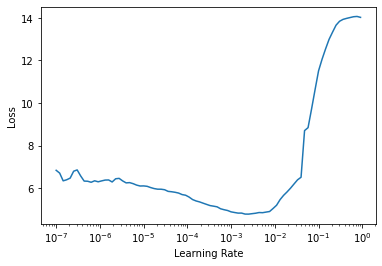

In [ ]:
learn.lr_find(suggestions=True)

It's also not a bad idea to run a batch through your model and make sure the shape of what goes in, and comes out, looks right.

In [ ]:
b = dls.one_batch()
preds = learn.model(b[0])
len(preds),preds[0], preds[1].shape

(4,
 tensor(7.9271, device='cuda:0', grad_fn=<NllLossBackward>),
 torch.Size([2, 34, 50264]))

In [ ]:
learn.fit_one_cycle(1, lr_max=3e-5, cbs=fit_cbs)

epoch,train_loss,valid_loss,rouge1,rouge2,rougeL,bertscore_precision,bertscore_recall,bertscore_f1,time
0,3.001620,2.727123,0.197000,0.042790,0.169573,0.819120,0.882985,0.849654,02:26


And now we can look at the generated predictions using our `text_gen_kwargs` above

In [ ]:
learn.show_results(learner=learn, max_n=2)

,text,target,prediction
0,hunts pond lane one family colonial built square feet rooms bedrooms baths square foot lot randolph st one family contemporary built square feet rooms bedrooms baths square foot lot shortleaf circle lincoln st one family cape cod built square feet rooms bedrooms baths square foot lot oliver st one family split level built square feet rooms bedrooms baths square foot lot noyes st one family ranch built square feet rooms bedrooms baths square foot lot faxon st one family old style built square feet rooms bedrooms baths square foot lot liberty park ave one family split entry built square feet rooms bedrooms baths square foot lot alida rd one family split level built square feet rooms bedrooms baths square foot lot parkside ave one family cape cod built square feet rooms bedrooms baths square foot lot whittier rd one family colonial built square feet rooms bedrooms baths square foot lot armstrong circle one family ranch built square feet rooms bedrooms baths square foot lot pond st condominium condo apt built square feet bedrooms baths arborway drive pine ridge drive one family split level built square feet rooms bedrooms baths square foot lot old pleasant st one family raised ranch built square feet rooms bedrooms baths square foot lot elm st boundary ave one family colonial built square feet rooms bedrooms baths square foot lot addison ave one family colonial built square feet,_START_ abington hunts pond lane one family colonial built in square feet rooms bedrooms baths on square foot lot _END_,_START_ one family colonial built square feet rooms bedrooms baths square foot lot randolph st one family contemporary built square foot rooms bedrooms bath square foot st lincoln st one cape cod one family cape cod built square ft rooms baths square ft lot noyes st one ranch one family old style built squareft st faxon st one old style build square feet st
1,new york april democratic presidential hopefuls hillary clinton bernie sanders vowed nominate latinos key cabinet posts administrations elected according answers questionnaire organized nation largest latino coalition question survey submitted national hispanic leadership agenda presidential candidates feb received responses two democratic contenders none republicans according results reviewed reuters latinos african americans emerged key voting blocs democratic race white house nomination far likely play large role outcomes big contests looming new york california see images democratic debate florida democrats clinton sanders promise include latinos cabinet miami fl march democratic presidential candidates senator bernie sanders democratic presidential candidate hillary clinton seen univision news washington post democratic presidential primary debate miami dade college kendall campus march miami florida miami fl march democratic presidential candidate hillary clinton speaks debate democratic presidential candidate senator bernie sanders univision news washington post democratic presidential primary debate miami dade college kendall campus march miami florida voters florida go polls march state primary kendall fl march democratic presidential candidate senator bernie sanders speaks debate democratic presidential candidate hillary clinton univision news washington post democratic presidential primary debate miami dade college,_START_ both clinton and sanders have already promised comprehensive immigration reform appealing to hispanic voters _END_,_START_ new york california see images democratic debate florida democrats clinton sanders promise include latinos cabinet _END_ poll shows latinos have emerged as key voting blocs in democratic race white house nomination far likely to play large role in outcome _END _


Even better though, blurr augments the fastai Learner with a `blurr_summarize` method that allows you to use huggingface's `PreTrainedModel.generate` method to create something more human-like.

In [ ]:
test_article = """
The past 12 months have been the worst for aviation fatalities so far this decade - with the total of number of people killed if airline 
crashes reaching 1,050 even before the Air Asia plane vanished. Two incidents involving Malaysia Airlines planes - one over eastern Ukraine and the other in the Indian Ocean - led to the deaths of 537 people, while an Air Algerie crash in Mali killed 116 and TransAsia Airways crash in Taiwan killed a further 49 people. The remaining 456 fatalities were largely in incidents involving small commercial planes or private aircraft operating on behalf of companies, governments or organisations. Despite 2014 having the highest number of fatalities so far this decade, the total number of crashes was in fact the lowest since the first commercial jet airliner took off in 1949 - totalling just 111 across the whole world over the past 12 months. The all-time deadliest year for aviation was 1972 when a staggering 2,429 people were killed in a total of 55 plane crashes - including the crash of Aeroflot Flight 217, which killed 174 people in Russia, and Convair 990 Coronado, which claimed 155 lives in Spain. However this year's total death count of 1,212, including those presumed dead on board the missing Air Asia flight, marks a significant rise on the very low 265 fatalities in 2013 - which led to it being named the safest year in aviation since the end of the Second World War. Scroll down for videos. Deadly: The past 12 months have been the worst for aviation fatalities so far this decade - with the total of number of people killed if airline crashes reaching 1,158 even before the Air Asia plane (pictured) vanished. Fatal: Two incidents involving Malaysia Airlines planes - one over eastern Ukraine (pictured) and the other in the Indian Ocean - led to the deaths of 537 people. Surprising: Despite 2014 having the highest number of fatalities so far this decade, the total number of crashes was in fact the lowest since the first commercial jet airliner took off in 1949. 2014 has been a horrific year for Malaysia-based airlines, with 537 people dying on Malaysia Airlines planes, and a further 162 people missing and feared dead in this week's Air Asia incident. In total more than half the people killed in aviation incidents this year had been flying on board Malaysia-registered planes. In January a total of 12 people lost their lives in five separate incidents, while the same number of crashes in February killed 107. 
"""

We can override the `text_gen_kwargs` we specified for our `DataLoaders` when we generate text using blurr's `Learner.blurr_generate` method

In [ ]:
outputs = learn.blurr_generate(test_article, early_stopping=True, num_beams=4, num_return_sequences=3)

for idx, o in enumerate(outputs):
    print(f'=== Prediction {idx+1} ===\n{o}\n')

=== Prediction 1 ===
 _START_ the total number of people killed if airline crashes reached 1,050 in the past 12 months - even before the Air Asia plane vanished. The total death count marks a significant rise on the very low 265 fatalities in 2013 - which led to it being named the safest year in aviation since the end of the Second World War.

=== Prediction 2 ===
 _START_ the total number of people killed if airline crashes reached 1,050 in the past 12 months - even before the Air Asia plane vanished. The total death count of 1,212 marks a significant rise on the very low 265 fatalities in 2013 - which led to it being named the safest year in aviation since the Second World War.

=== Prediction 3 ===
 _START_ the total number of people killed if airline crashes reached 1,050 in the past 12 months - even before the Air Asia plane vanished. The total death count marks a significant rise on the very low 265 fatalities in 2013 - which led to it being named the safest year in aviation sinc

In [ ]:
learn.metrics = None
learn.export(fname='ft_cnndm_export.pkl')

In [ ]:
inf_learn = load_learner(fname='ft_cnndm_export.pkl')
inf_learn.blurr_generate(test_article)

[' _START_ the total number of people killed if airline crashes reached 1,050 in the past 12 months - even before the Air Asia plane vanished. The total death count marks a significant rise on the very low 265 fatalities in 2013 - which led to it being named the safest year in aviation since the end of the Second World War.']

# bert,4

In [ ]:
import json
import glob
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from  collections import OrderedDict



In [ ]:
!pip install bert-extractive-summarizer

In [ ]:
!pip install transformers


In [ ]:
!pip install sentencepiece

In [ ]:
from summarizer import Summarizer,TransformerSummarizer

In [ ]:
body = df.text.values[0]

## BERT Summarizer



In [ ]:
bert_model = Summarizer()
bert_summary = ''.join(bert_model(body, min_length=10))
print(bert_summary)


## GPT2_model



In [ ]:
GPT2_model = TransformerSummarizer(transformer_type="GPT2",transformer_model_key="gpt2-medium")
full = ''.join(GPT2_model(body, min_length=60))
print(full)

# Summarization using Spacy

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
stopwords = list (STOP_WORDS)
punctuation += '\n'
from heapq import nlargest


# Defining a Class for extracting Summary
class Summarizer():
    
    ## constructor for data loading
    ## give either path or corpus itself
    def __init__(self, corpus = None):
        self.mCorpus = ''
        self.mWordFrequencies = {}
        self.mSentScore = {}
        self.mNumSentences = 0
        
        # if path != None:
        #     file = open(path, "r")
        #     self.mCorpus = self.mCorpus + file.read()
        # elif corpus != None:
        self.mCorpus = corpus
            
        self.mNlp = spacy.load('en_core_web_sm')
        self.mDoc = self.mNlp(self.mCorpus)
    
    
    # Function for Printing Corpus
    def PrintCorpus(self):
        print(self.mCorpus)
    
    
    ## defining a function for Calculating 
    ## word frequiences
    def WordFrequencyCalculator(self):
        for word in self.mDoc:
            wordInLowerCase = word.text.lower()
            
            if (wordInLowerCase not in stopwords) and (wordInLowerCase not in punctuation):
                if wordInLowerCase not in self.mWordFrequencies.keys():
                    self.mWordFrequencies[wordInLowerCase] = 1
                else:
                    self.mWordFrequencies[wordInLowerCase] += 1
    
        return
    
    
    ## Function for normalizing Frequency Values
    def WordFreqNormalizer(self):
        maxFreq = max(self.mWordFrequencies.values())
        
        for word in self.mWordFrequencies.keys():
            self.mWordFrequencies[word] = self.mWordFrequencies[word] / maxFreq
        
        return
    
    # Function For calculating  sentence score
    # based on computed normalized word Frequencies
    def CalSentScore(self):
        sentences = [sent for sent in self.mDoc.sents]
        self.mNumSentences = len(sentences)
        
        for sent in sentences:
            for word in sent:
                wordInLowerCase = word.text.lower()
                
                if wordInLowerCase in self.mWordFrequencies.keys():
                    if sent not in self.mSentScore.keys():
                        self.mSentScore[sent] = self.mWordFrequencies[wordInLowerCase]
                    else:
                        self.mSentScore[sent] += self.mWordFrequencies[wordInLowerCase]
        return
    
    ## Writting the MainFunction for this script now
    def SummarizeMyText(self, fractionToReduce = 0.2):
        self.WordFrequencyCalculator()
        self.WordFreqNormalizer()
        self.CalSentScore()
        
        reducedSentNum = int (self.mNumSentences * fractionToReduce)
        print ('Total number of Sentences = {}'.format(self.mNumSentences))
        print('Num of Sentences Reduced to {}'.format(reducedSentNum))
        print('Summary as follows : \n')
        
        summaryList = nlargest(reducedSentNum, self.mSentScore, key = self.mSentScore.get)
        for sent in summaryList:
            print(sent, end = '')
        
        
    
    


In [ ]:
summarizer = Summarizer(corpus= df.text.values[1])
summarizer.SummarizeMyText(fractionToReduce = 0.5)


Total number of Sentences = 29
Num of Sentences Reduced to 14
Summary as follows : 

first quarter year percent percent year growth come taking advantage country pool low cost talent recent months technology hub bangalore become center efforts combine high value cutting edge services low cost model instance india research lab units bangalore new delhi hundred employees ph created crucial products like container tracking system global shipping companies warranty management system automakersseamlessly three centers bangalore chicago outside london said amitabh ray director global delivery global services kinds capabilities global scale unmatched smaller rivals playing catch talking customers needs developing custom built software infosys technologies instance consulting unit headquarters fremont calif near silicon valley consultants additional consultants india meanwhilemr annaswamy chief executive india acknowledged growth difficult thousands recruits quickly integrated company salaries

# hugging face

In [ ]:
!pip -q install transformers

In [ ]:
from transformers import pipeline


In [ ]:
summarizer = pipeline('summarization')


In [ ]:
article = df.text.values[1]

In [ ]:
len(df.text.values[1])

4417

In [ ]:
summarizer(article, max_length=len(df.text.values[1]), do_sample=False)

[{'summary_text': ' bangalore india june world biggest computer services company could chosen appropriate setting lay strategy staying top building housing software laboratory application service teams . bangalore chicago outside london . india grew percent first quarter year percent percent year growth come taking advantage country pool low cost talent .'}]